# Importing

In [ ]:
import matplotlib.pyplot as plt
import cv2 
import numpy as np
from skimage.color import rgb2gray
import copy
import math

# Loading Image

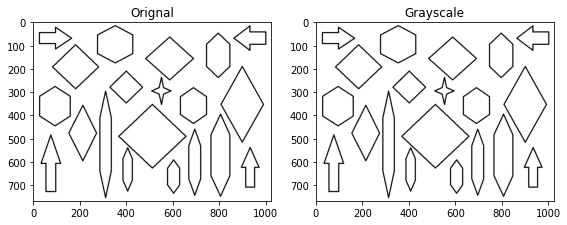

In [9]:
image = cv2.imread('edges.jpg')
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
grayscale = rgb2gray(image)
shape = grayscale.shape
def plot(image):
  figure,axes = plt.subplots(1,2,figsize=(8,4))
  axes =axes.ravel()
  axes[0].imshow(image, cmap='gray')
  axes[0].set_title("Orignal")
  axes[1].imshow(grayscale, cmap='gray')
  axes[1].set_title("Grayscale")
  figure.tight_layout()
  plt.show
plot(image)

# Horizontal Edging

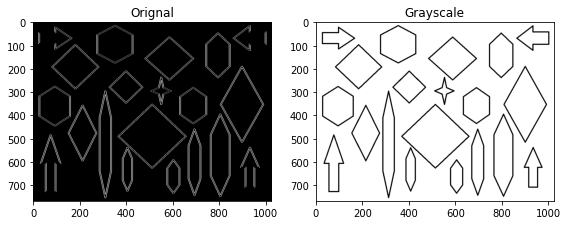

In [10]:
def Derivative(grayscale):
  DerivativeImage=np.full(shape,255)
  for row in range(0,shape[0]-1):
    for col in range(0,shape[1]-1):
      DerivativeImage[row][col]=round(grayscale[row][col+1]-grayscale[row][col])
  return DerivativeImage

firstDerivativeImage=Derivative(grayscale)

secondDerivativeImage=Derivative(firstDerivativeImage)
for row in range(0,secondDerivativeImage.shape[0]):
  for col in range(0,secondDerivativeImage.shape[1]):
    if(secondDerivativeImage[row][col]==0):
      secondDerivativeImage[row][col]=0
    elif(secondDerivativeImage[row][col]==255):
      secondDerivativeImage[row][col]=0
    else:
      secondDerivativeImage[row][col]=255
horizontalEdges=secondDerivativeImage.copy()
plot(horizontalEdges)

# Horizontal Edging

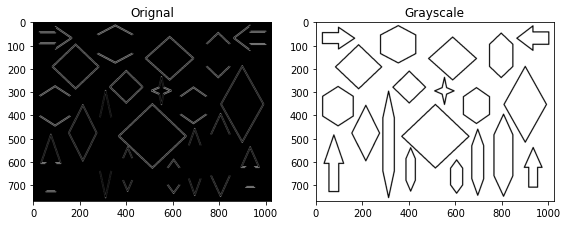

In [11]:
def Derivative(grayscale):
  DerivativeImage=np.full(shape,255)
  for col in range(0,shape[1]-1):
    for row in range(0,shape[0]-1):
      DerivativeImage[row][col]=round(grayscale[row+1][col]-grayscale[row][col])
  return DerivativeImage

firstDerivativeImage=Derivative(grayscale)
secondDerivativeImage=Derivative(firstDerivativeImage)
for row in range(0,secondDerivativeImage.shape[0]):
  for col in range(0,secondDerivativeImage.shape[1]):
    if(secondDerivativeImage[row][col]==0):
      secondDerivativeImage[row][col]=0
    elif(secondDerivativeImage[row][col]==255):
      secondDerivativeImage[row][col]=0
    else:
      secondDerivativeImage[row][col]=255
verticalEdges=secondDerivativeImage.copy()
plot(verticalEdges)
        

# Combining

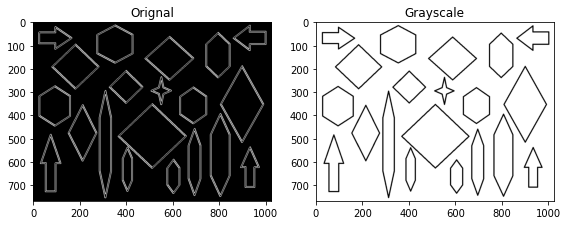

In [12]:
combineImage=np.zeros(shape)
for row in range(0,secondDerivativeImage.shape[0]):
  for col in range(0,secondDerivativeImage.shape[1]):
    if verticalEdges[row][col] >= horizontalEdges[row][col]:
      combineImage[row][col]= verticalEdges[row][col]
    elif verticalEdges[row][col] < horizontalEdges[row][col]:
      combineImage[row][col]= horizontalEdges[row][col]
    else:
      combineImage[row][col]= 0
plot(combineImage)

# CV2 Version

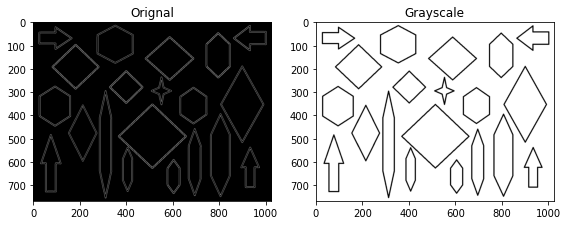

In [14]:
img = cv2.imread('edges.jpg',0)
edges = cv2.Canny(img,100,200)
plot(edges)